# Aprendizaje Automático y Big Data
## Práctica 1 : Regresión Lineal

Mario Quiñones Pérez y Guillermo García Patiño Lenza



### PARTE 1

In [63]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

In [64]:
def coste(X, Y, T):
    m = len(X)
    estimacion = T[0] + T[1]*X
    error = estimacion - Y
    i = sum(error**2)
    coste = (1/(2*m))*i
    return coste

In [65]:
def calculoJ(datos, a):
    X = datos[:,0]
    Y = datos[:,-1]
    t0 = 0
    t1 = 0
    m = len(X)
    for i in range(1500):
        s0 = s1 = 0
        for i in range(m):
            s0 = s0 + (t0 + t1*X[i] - Y[i])
            s1 = s1 + (t0 + t1*X[i] - Y[i])*X[i]
        t0 = t0 - s0*a/m
        t1 = t1 - s1*a/m
    return (t0, t1)

In [66]:
def main1():
    datos = carga_csv("ex1data1.csv")
    params = calculoJ(datos, 0.01)
    X = datos[:,0]
    Y = datos[:,-1]
    # dibujar grafica
    plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = params[0] + params[1] * min_x
    max_y = params[0] + params[1] * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.savefig("resultado.pdf")

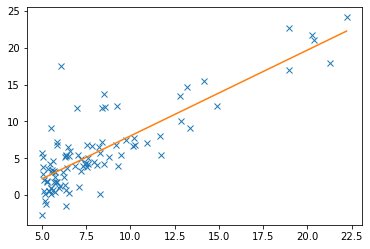

In [67]:
main1()

## Apartado 1.1

In [68]:
def make_data(t0_range, t1_range, X, Y) :        
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    for ix , iy in np.ndindex(Theta0.shape):
        Coste[ix,iy] = coste(X, Y, [Theta0[ix,iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [ ]:
def draw():
    plt.contour(r[0], r[1], r[2], np.logspace(-2, 3, 20))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(r[0], r[1], r[2], cmap=cm.rainbow, linewidth=0,antialiased=False)
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                         tmp_planes[0], tmp_planes[1], 
                         tmp_planes[4], tmp_planes[5])
    view_1 = (25, -135)
    view_2 = (25, -45)
    init_view = view_2
    ax.view_init(*init_view)
    plt.show()

In [110]:
def main11():
    datos = carga_csv("ex1data1.csv")
    X = datos[:,0]
    Y = datos[:,1]
    r = make_data([-10, 10], [-1, 4], X, Y)
    draw(X,Y,r)

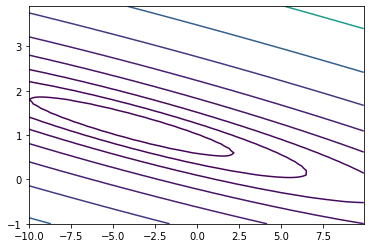

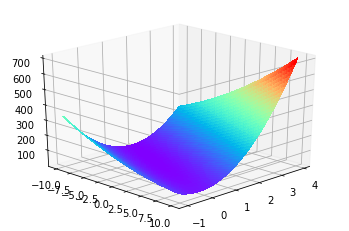

In [111]:
main11()